# 1. IMPORT LIBRARIES

In [6]:
import numpy as np
import pandas as pd
import sys
print('Python version: {}'.format(sys.version))
print('Numpy: {}'.format(np.version))
print('Pandas: {}'.format(pd.__version__))

Python version: 3.10.4 | packaged by conda-forge | (main, Mar 30 2022, 08:38:02) [MSC v.1916 64 bit (AMD64)]
Numpy: <module 'numpy.version' from 'c:\\Users\\PandiyaDS\\anaconda3\\envs\\env1\\lib\\site-packages\\numpy\\version.py'>
Pandas: 1.4.2


In [19]:
# ML packages
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
# Data Pre-processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [8]:
# Visual
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as plx
%matplotlib inline

In [9]:
# File system
import os
from os import listdir
from os.path import isfile, join
# Warning
import warnings
warnings.filterwarnings('ignore')

# 2. READ DATA

In [5]:
df = pd.read_csv('trainKNN.txt', header=None)
df.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'TypeOfGlass']
df.head()
# 1. ID number: 1 to 214
# 2. RI: refractive index
# 3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
# 4. Mg: Magnesium
# 5. Al: Aluminum
# 6. Si: Silicon
# 7. K: Potassium
# 8. Ca: Calcium
# 9. Ba: Barium
# 10. Fe: Iron
# 11. Type of glass: (class attribute)
# -- 1 building_windows_float_processed
# -- 2 building_windows_non_float_processed
# -- 3 vehicle_windows_float_processed
# -- 4 vehicle_windows_non_float_processed (none in this database)
# -- 5 containers
# -- 6 tableware
# -- 7 headlamps

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,TypeOfGlass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [10]:
df.shape

(196, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           196 non-null    int64  
 1   RI           196 non-null    float64
 2   Na           196 non-null    float64
 3   Mg           196 non-null    float64
 4   Al           196 non-null    float64
 5   Si           196 non-null    float64
 6   K            196 non-null    float64
 7   Ca           196 non-null    float64
 8   Ba           196 non-null    float64
 9   Fe           196 non-null    float64
 10  TypeOfGlass  196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 17.0 KB


In [15]:
df.isnull().sum()

ID             0
RI             0
Na             0
Mg             0
Al             0
Si             0
K              0
Ca             0
Ba             0
Fe             0
TypeOfGlass    0
dtype: int64

In [16]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
ID,196.0,102.86,61.20,1.00,49.75,101.50,153.25,211.00
RI,196.0,1.52,0.00,1.51,1.52,1.52,1.52,1.53
Na,196.0,13.38,0.78,10.73,12.88,13.28,13.79,15.79
Mg,196.0,2.76,1.39,0.00,2.36,3.48,3.61,4.49
Al,196.0,1.45,0.49,0.29,1.19,1.36,1.62,3.50
Si,196.0,72.64,0.76,69.81,72.32,72.81,73.08,75.18
K,196.0,0.52,0.67,0.00,0.14,0.56,0.61,6.21
Ca,196.0,8.91,1.42,5.43,8.22,8.57,9.09,16.19
Ba,196.0,0.16,0.49,0.00,0.00,0.00,0.00,3.15
Fe,196.0,0.05,0.09,0.00,0.00,0.00,0.09,0.34


Observation
--------------
1. Rows: 196 and Columns: 11
2. Non of the column have Null values.
3. All columns have data type float or int type.
4. All features are in different ranges, need to normalize and standardize it.

# 3. DATA PRE-PROCESSING

## 3.1 Data Distribution

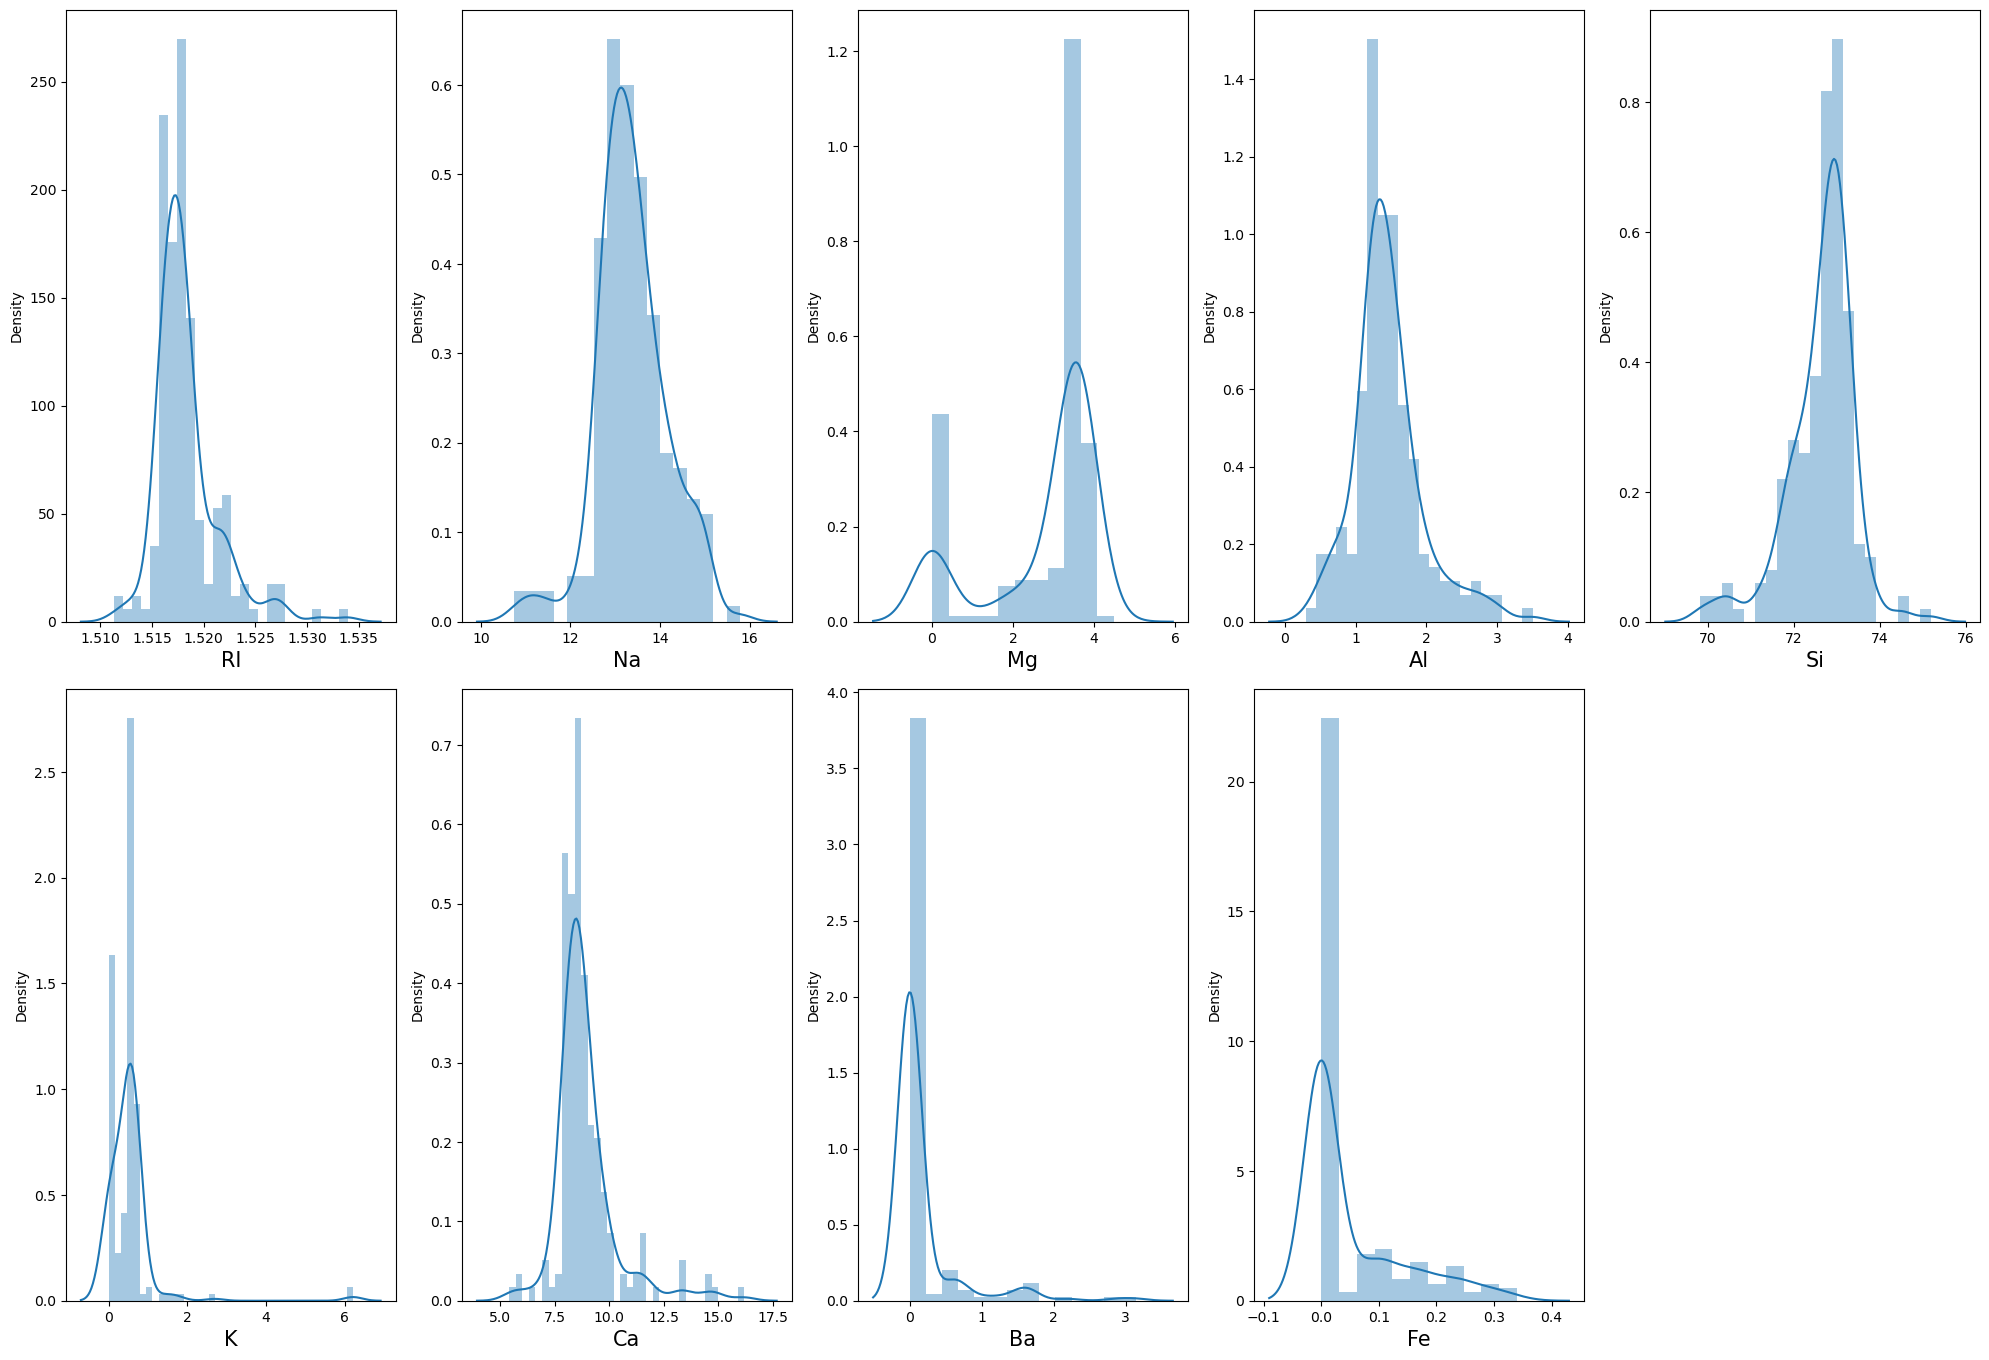

In [17]:
# Frequency (Density) plot for all features and check for improvement
plt.figure(figsize=(20, 20))
pltnumber = 1

for column in df.iloc[:, 1:-1]:
    if pltnumber <= 14:
        ax = plt.subplot(3, 5, pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=15)
    pltnumber += 1
plt.tight_layout()
plt.show()

## 3.2 Outliers

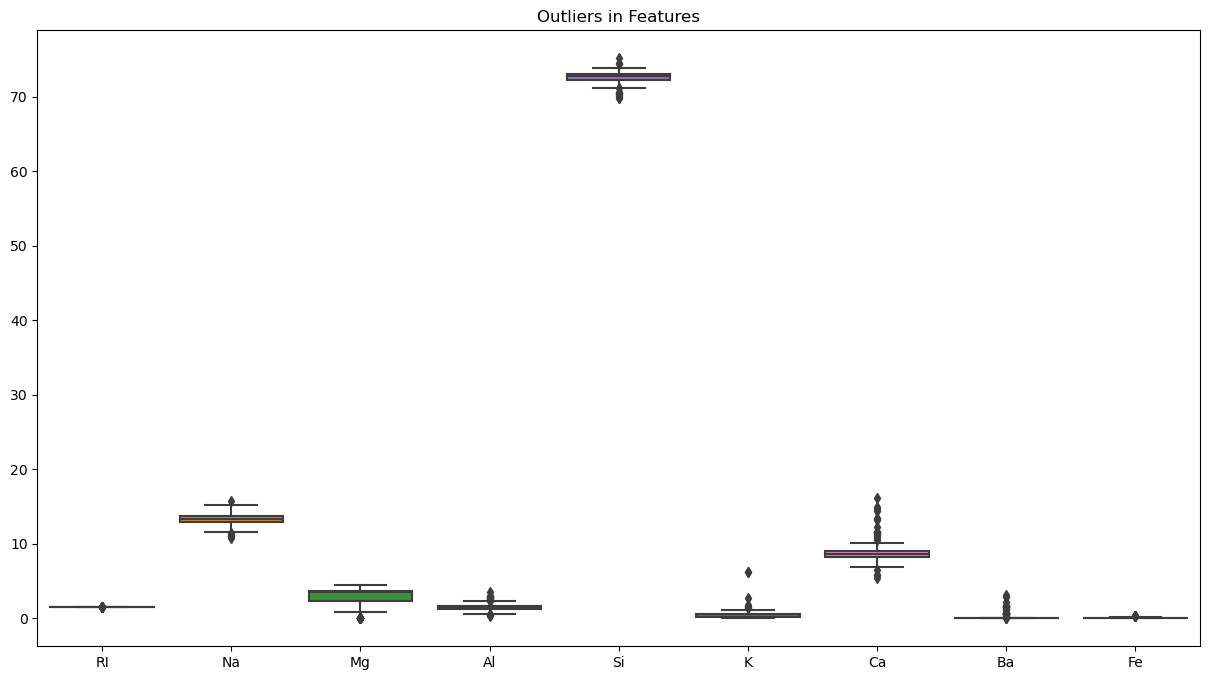

Column RI outliers = 8.16%
Column Na outliers = 3.06%
Column Mg outliers = 17.86%
Column Al outliers = 8.67%
Column Si outliers = 6.12%
Column K outliers = 3.57%
Column Ca outliers = 11.22%
Column Ba outliers = 100.00%
Column Fe outliers = 7.14%
Column TypeOfGlass outliers = 16.33%


In [18]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.iloc[:, 1:-1])
plt.title('Outliers in Features')
plt.show()

# Interquartile range
for k, v in df.iloc[:, 1:].items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5*irq) | (v >= q3 + 1.5*irq)]
    prec = np.shape(v_col)[0] * 100 / np.shape(df.iloc[:, 1:-1])[0]
    print('Column %s outliers = %.2f%%' % (k, prec))

## 3.3 Normalization

In [ ]:
normalize = MinMaxScaler()
normalize.fit()

## 3.4 Standarization

# 4. FEATURE ENGINEERING

## 4.1 Dimensionality Reduction

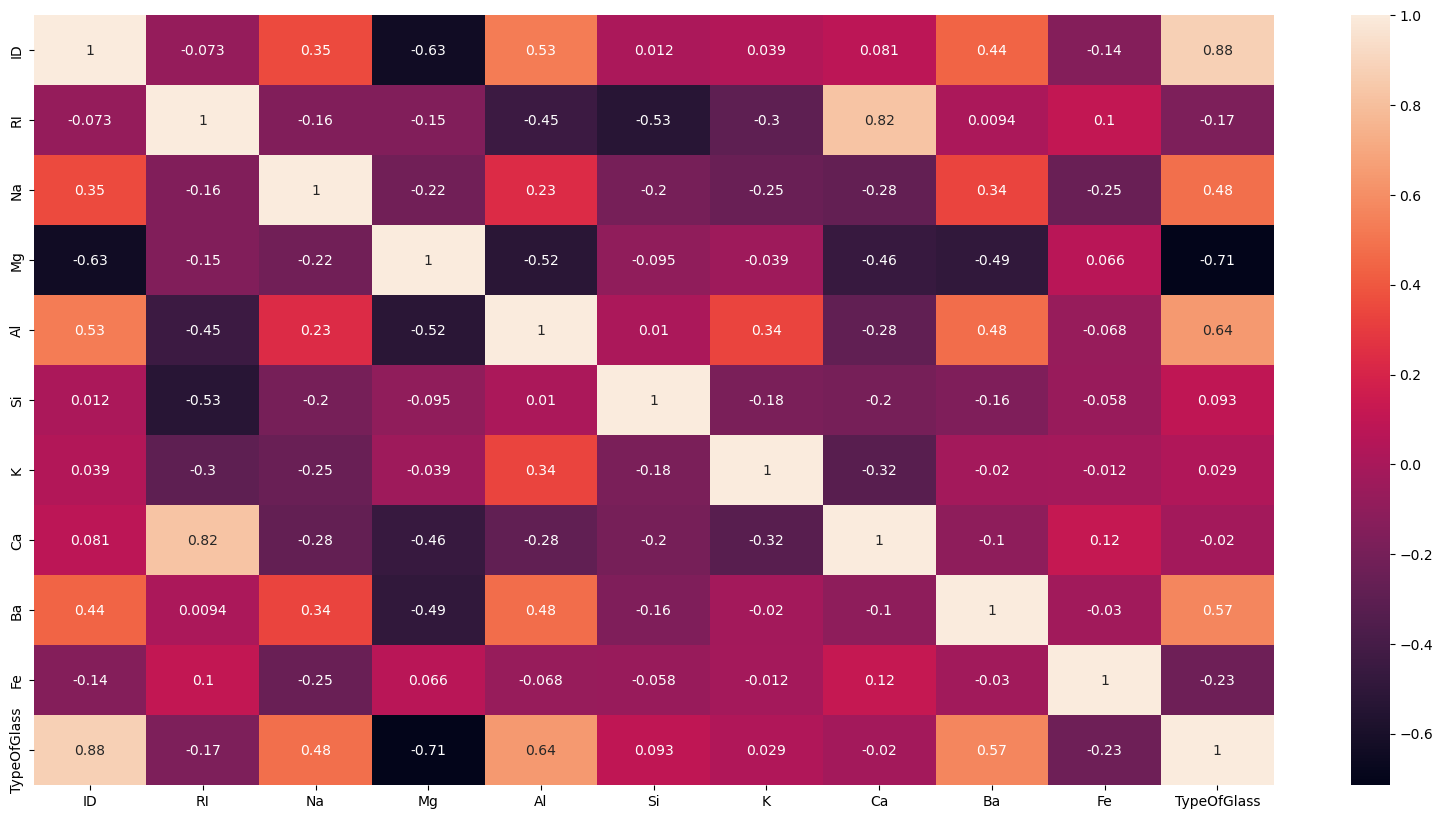

In [20]:
# Correlation Heat map
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

### 4.1.1 K & Ca column Analysis

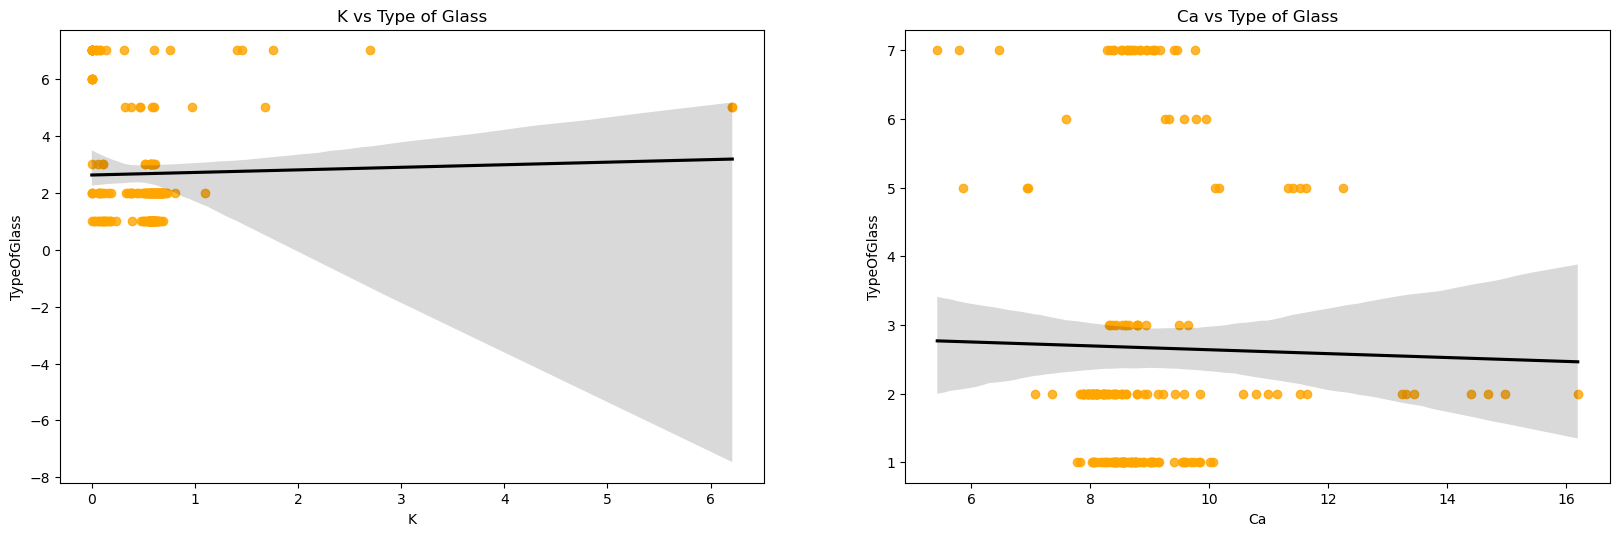

In [21]:
# Scatter plot between K & Ca vs Type of Glass
plt.figure(figsize=(20, 20))
plt.subplot(321)
sns.regplot(x=df.K, y=df.TypeOfGlass, scatter_kws={'color':'orange'}, line_kws={'color':'black'})
plt.title('K vs Type of Glass')

plt.subplot(322)
sns.regplot(x=df.Ca, y=df.TypeOfGlass, scatter_kws={'color':'orange'}, line_kws={'color':'black'})
plt.title('Ca vs Type of Glass')

plt.show()


Observation
--------------
1. Correlation of K & Ca with respect to Type of Glass is less than 5%.
2. Regression line almost flat indicating that K & Ca are almost most independent with respect to Type of Glass.
3. ID, K & Ca can be removed from data frame.

## 4.2 Dropping columns

In [22]:
# Drop unnecessary columns ID, K, Ca
df.drop(columns=['ID', 'K', 'Ca'], inplace=True)
df.head()

,RI,Na,Mg,Al,Si,Ba,Fe,TypeOfGlass
0,1.52101,13.64,4.49,1.10,71.78,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.0,0.0,1


In [23]:
df.shape # Three columns removed

(196, 8)